In [555]:
from math import pi
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
)

from bokeh.plotting import figure, output_notebook

%matplotlib inline
output_notebook()

Loading BokehJS ...

In [556]:
# Get raw data
month_list = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
fnames     = ['Day',1,2,3,4,5,6,7,8,9,10,11,12] # replacing month by number make plotting easiers
mydata     = pd.read_csv('Pluviometry.csv',names=fnames,skiprows=1)
mydata     = mydata.replace(np.nan, 0)

print( '\n-------------------')
print( 'Before Manipulation' )
print( '-------------------')
print( mydata.head(10) )
print( '\n' )

# Adding the year to the raw data (1995 +1 every 31 entry)
Npts = range(0,len(mydata))
date = []
date_iter=1995
for i in Npts:
    if (i!=0 and i%31==0):
        date_iter=date_iter+1
    date.append(date_iter)
YearDim = pd.Series( date , index=Npts )
mydata['Year'] = YearDim

# Arrange raw data with a bi-dimenstional index
mydata = mydata.set_index( ['Year','Day'] )
mydata.columns.name = 'Month'
print( '\n---------------------------------------------------')
print( 'After adding the year and setting up an (y,d)-index' )
print( '---------------------------------------------------')
print( mydata.head(10) )
print( '\n' )


# Arrange raw data with 3-dimensional index (y,m,d)
mydata = pd.DataFrame( mydata.stack(), columns=['millimeter'] ).reset_index()
mydata = mydata.set_index(['Year','Month','Day'])
print( '\n-------------------')
print( 'After (y,m,d)-index'  )
print( '-------------------'  )
print( mydata.head(10) )
print( '\n' )


# Full Data with 1D index but all information
fullData = mydata
fullData = fullData.reset_index()
print( '\n-----------------------')
print( 'Full data with 1D index'  )
print( '-----------------------'  )
print( fullData.head(10) )
print( '\n' )




-------------------
Before Manipulation
-------------------
   Day    1    2    3    4    5     6    7    8     9    10    11    12
0    1  0.0  0.0  4.5  4.0  0.0   2.5  6.0  0.0   0.0  16.5   0.0   0.0
1    2  0.0  0.0  0.0  1.0  0.0   1.0  0.0  3.0   0.0  14.0   3.5   0.0
2    3  0.0  0.0  0.0  7.0  0.0   0.0  0.0  0.0   0.0   1.5   0.0   0.0
3    4  0.0  0.0  0.0  1.5  0.0   0.0  0.0  0.3   0.0   0.0   0.0   0.0
4    5  0.0  0.0  0.0  3.0  0.0   0.0  0.0  0.0   0.0   4.0   0.0   0.0
5    6  0.0  0.0  0.0  1.5  0.0   0.0  0.0  0.0   0.0   2.0   0.0   0.0
6    7  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  23.0   4.5   0.0   5.5
7    8  1.0  2.0  0.0  2.0  0.0   0.0  0.0  0.0   7.5   2.0   0.0   0.0
8    9  0.0  0.0  0.0  0.0  0.0  48.0  0.0  0.0   0.5   0.0   0.0   0.0
9   10  9.5  0.0  0.0  0.0  0.0  57.0  2.5  0.0   6.0   4.5  15.5  10.0



---------------------------------------------------
After adding the year and setting up an (y,d)-index
----------------------------------------

In [557]:
# Group data according to the year, the month or the day
dataG = mydata.groupby(['Month','Year']) 
for name,group in dataG:
    print( name )
    print( group.head(10) )
    
    
fullDataG = fullData.groupby(['Month','Year'])
for name,group in fullDataG:
    print( name )
    print( group.head(10) )

(1, 1995)
                millimeter
Year Month Day            
1995 1     1           0.0
           2           0.0
           3           0.0
           4           0.0
           5           0.0
           6           0.0
           7           0.0
           8           1.0
           9           0.0
           10          9.5
(1, 1996)
                millimeter
Year Month Day            
1996 1     1           0.0
           2           0.0
           3           9.0
           4           3.0
           5           3.0
           6           4.0
           7           0.0
           8           3.0
           9          12.0
           10          1.0
(1, 1997)
                millimeter
Year Month Day            
1997 1     1           8.0
           2           0.0
           3           0.0
           4           0.0
           5           0.0
           6           9.0
           7           0.0
           8           0.0
           9           0.0
           10          0.

           10          0.0
(3, 2014)
                millimeter
Year Month Day            
2014 3     1           0.0
           2           0.0
           3           0.0
           4           4.0
           5           2.0
           6           0.0
           7           2.5
           8           0.0
           9           0.0
           10          0.0
(3, 2015)
                millimeter
Year Month Day            
2015 3     1           0.0
           2           0.0
           3           0.0
           4           0.0
           5           0.0
           6           0.0
           7           1.5
           8          21.5
           9           0.0
           10          0.0
(3, 2016)
                millimeter
Year Month Day            
2016 3     1           0.0
           2           0.0
           3           7.0
           4           5.0
           5           2.0
           6           0.0
           7           0.0
           8           0.0
           9           0.

(6, 2007)
                millimeter
Year Month Day            
2007 6     1           0.0
           2           0.0
           3           0.0
           4           0.0
           5           4.0
           6           4.0
           7           0.0
           8           0.0
           9           0.0
           10          0.0
(6, 2008)
                millimeter
Year Month Day            
2008 6     1           0.0
           2           0.0
           3           0.0
           4           0.0
           5           0.0
           6           0.0
           7           0.0
           8           0.0
           9           0.0
           10          0.0
(6, 2009)
                millimeter
Year Month Day            
2009 6     1           0.0
           2           0.0
           3           0.0
           4           1.5
           5           0.0
           6           0.0
           7           0.0
           8           0.0
           9           0.0
           10          1.

                millimeter
Year Month Day            
2003 9     1           0.0
           2           0.0
           3           1.5
           4           0.0
           5           0.0
           6           0.0
           7           0.0
           8           0.0
           9           0.0
           10          0.0
(9, 2004)
                millimeter
Year Month Day            
2004 9     1           0.0
           2           0.0
           3           0.0
           4           0.0
           5           0.0
           6           0.0
           7           5.0
           8           3.0
           9          13.0
           10          1.0
(9, 2005)
                millimeter
Year Month Day            
2005 9     1           0.0
           2           0.0
           3           0.0
           4           0.0
           5           0.0
           6           0.0
           7           0.0
           8           5.0
           9           1.5
           10          0.0
(9, 2006

(12, 2002)
                millimeter
Year Month Day            
2002 12    1           2.5
           2           0.0
           3           0.0
           4           5.5
           5           2.0
           6           3.5
           7           0.0
           8          12.0
           9           0.0
           10          8.0
(12, 2003)
                millimeter
Year Month Day            
2003 12    1           2.5
           2           0.0
           3           0.0
           4           6.0
           5           0.0
           6           0.0
           7           0.0
           8           0.0
           9           0.0
           10          0.0
(12, 2004)
                millimeter
Year Month Day            
2004 12    1           5.0
           2           3.5
           3           0.0
           4           0.0
           5          18.5
           6           0.0
           7           0.0
           8           2.0
           9           0.0
           10         

(3, 2003)
      Year  Month  Day  millimeter
2978  2003      3    1         0.0
2990  2003      3    2         0.0
3002  2003      3    3         8.5
3014  2003      3    4         0.0
3026  2003      3    5         1.0
3038  2003      3    6         0.0
3050  2003      3    7         0.0
3062  2003      3    8         3.5
3074  2003      3    9         0.0
3086  2003      3   10         0.0
(3, 2004)
      Year  Month  Day  millimeter
3350  2004      3    1         0.0
3362  2004      3    2         0.0
3374  2004      3    3         2.5
3386  2004      3    4         0.0
3398  2004      3    5         0.0
3410  2004      3    6         0.0
3422  2004      3    7         1.0
3434  2004      3    8         0.0
3446  2004      3    9         0.0
3458  2004      3   10         0.0
(3, 2005)
      Year  Month  Day  millimeter
3722  2005      3    1         0.0
3734  2005      3    2         5.0
3746  2005      3    3         9.0
3758  2005      3    4         1.0
3770  2005      3    5   

      Year  Month  Day  millimeter
4841  2008      6    1         0.0
4853  2008      6    2         0.0
4865  2008      6    3         0.0
4877  2008      6    4         0.0
4889  2008      6    5         0.0
4901  2008      6    6         0.0
4913  2008      6    7         0.0
4925  2008      6    8         0.0
4937  2008      6    9         0.0
4949  2008      6   10         0.0
(6, 2009)
      Year  Month  Day  millimeter
5213  2009      6    1         0.0
5225  2009      6    2         0.0
5237  2009      6    3         0.0
5249  2009      6    4         1.5
5261  2009      6    5         0.0
5273  2009      6    6         0.0
5285  2009      6    7         0.0
5297  2009      6    8         0.0
5309  2009      6    9         0.0
5321  2009      6   10         1.5
(6, 2010)
      Year  Month  Day  millimeter
5585  2010      6    1         3.5
5597  2010      6    2        13.0
5609  2010      6    3         0.0
5621  2010      6    4         0.0
5633  2010      6    5         1.5


      Year  Month  Day  millimeter
2984  2003      9    1         0.0
2996  2003      9    2         0.0
3008  2003      9    3         1.5
3020  2003      9    4         0.0
3032  2003      9    5         0.0
3044  2003      9    6         0.0
3056  2003      9    7         0.0
3068  2003      9    8         0.0
3080  2003      9    9         0.0
3092  2003      9   10         0.0
(9, 2004)
      Year  Month  Day  millimeter
3356  2004      9    1         0.0
3368  2004      9    2         0.0
3380  2004      9    3         0.0
3392  2004      9    4         0.0
3404  2004      9    5         0.0
3416  2004      9    6         0.0
3428  2004      9    7         5.0
3440  2004      9    8         3.0
3452  2004      9    9        13.0
3464  2004      9   10         1.0
(9, 2005)
      Year  Month  Day  millimeter
3728  2005      9    1         0.0
3740  2005      9    2         0.0
3752  2005      9    3         0.0
3764  2005      9    4         0.0
3776  2005      9    5         0.0


     Year  Month  Day  millimeter
11   1995     12    1         0.0
23   1995     12    2         0.0
35   1995     12    3         0.0
47   1995     12    4         0.0
59   1995     12    5         0.0
71   1995     12    6         0.0
83   1995     12    7         5.5
95   1995     12    8         0.0
107  1995     12    9         0.0
119  1995     12   10        10.0
(12, 1996)
     Year  Month  Day  millimeter
383  1996     12    1         0.0
395  1996     12    2         0.0
407  1996     12    3         2.5
419  1996     12    4         0.0
431  1996     12    5         5.0
443  1996     12    6         2.0
455  1996     12    7         3.0
467  1996     12    8         0.0
479  1996     12    9         9.0
491  1996     12   10         7.0
(12, 1997)
     Year  Month  Day  millimeter
755  1997     12    1         2.5
767  1997     12    2         6.0
779  1997     12    3         4.5
791  1997     12    4         7.0
803  1997     12    5         0.0
815  1997     12    6     

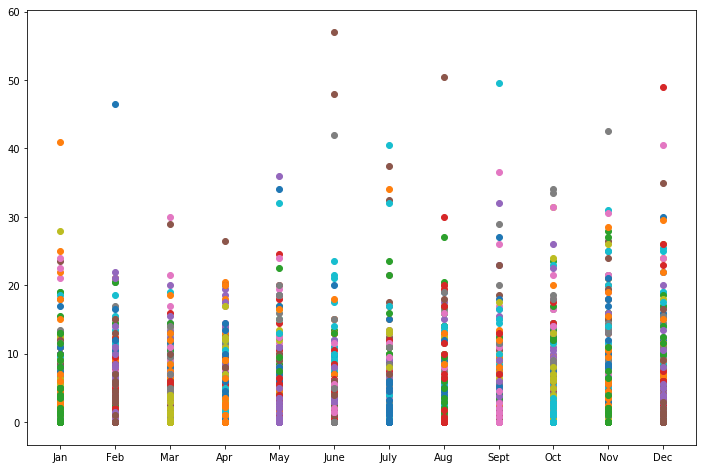

In [558]:
plt.figure(figsize=(12,8))
for name,group in dataG:
    x = group.index.get_level_values('Month')
    plt.xticks(range(1,13),month_list)
    plt.scatter(x,group,label=name)

(0, 4)

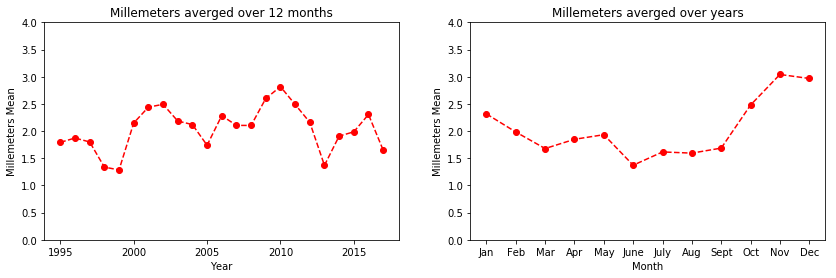

In [559]:
dataYmean = fullData.groupby('Year') .mean() # Average mm over month and days, for each year
dataMmean = fullData.groupby('Month').mean() # Average mm over days and years, for each month
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Millemeters averged over 12 months")
plt.xlabel('Year')
plt.ylabel('Millemeters Mean')
plt.plot(dataYmean,'ro--')
plt.ylim(0,4)
plt.subplot(122)
plt.title("Millemeters averged over years")
plt.xlabel('Month')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'] )
plt.ylabel('Millemeters Mean')
plt.plot(dataMmean,'ro--')
plt.ylim(0,4)

In [560]:
# Prepare dataframe where millimeter is summed over days
df=fullData.groupby(['Year','Month'])  # Goup over years x 
df=df.sum()
df=df.reset_index()
df=df.drop('Day',axis=1)
print(df.head(10))

   Year  Month  millimeter
0  1995      1        38.5
1  1995      2         9.5
2  1995      3        14.0
3  1995      4        39.5
4  1995      5        28.5
5  1995      6       126.5
6  1995      7        22.0
7  1995      8        10.8
8  1995      9       150.5
9  1995     10        98.0


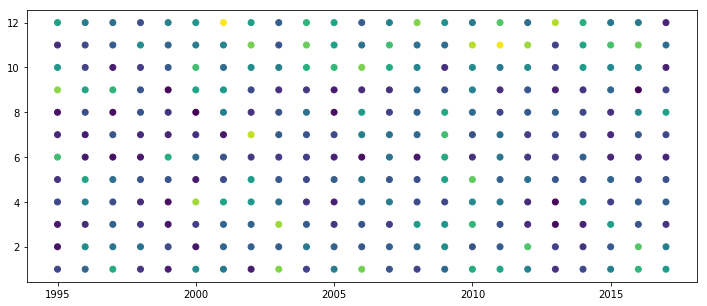

In [561]:
plt.figure(figsize=(12,5))
plt.scatter(df['Year'], df['Month'] , c = np.array(df['millimeter']) )

In [570]:
# Convert the year into string - seems to be necessary 
# for bokeh plotting in case of categorical axis
df['YearSTR'] = df['Year']
df['YearSTR'] = df['YearSTR'].astype(str)

In [568]:
# Create a nice colormap (like the original NYTimes plot)
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper( palette=colors, low=df.millimeter.min(), high=df.millimeter.max() )

# Specify the tools we want on the plot
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

# Get the array of years and months 
# and convert is in a list of string (needed by x_range arg of figure())
years  = range(df.Year.min() ,df.Year.max() +1)
months = range(df.Month.min(),df.Month.max()+1)
years_str  = list( str(y) for y in years  )
months_str = list( str(m) for m in months )

# Get the data to be plotted
source = ColumnDataSource(data=dict(
    YearSTR=df.YearSTR,
    Month=df.Month,
    millimeter=df.millimeter
))


In [569]:
# Prepare the figure
Title = "Rain in Lamballe ({0} - {1})".format(years[0], years[-1])
p = figure( title=Title,                          # title, 
            x_range=years_str,                    # x axis range/label
            y_range=list(reversed(month_list)),   # y axis range/label
            x_axis_location="above",              # x axis location
            plot_width=950, plot_height=500,      # figure size 
            tools=TOOLS,                          # load the list of present tools 
            toolbar_location='below'              # Specify location of the toolbar
          )

# Figure cosmetics
p.grid.grid_line_color = None             # no grid
p.title.text_font_size = '12pt'           # title font size
p.axis.axis_line_color = None             # no axis
p.axis.major_tick_line_color = None       # no ticks (seem to work only for categorical axis)
p.axis.major_label_text_font_size = '8pt' # axis label font size
p.axis.major_label_standoff = 0           # axis label offset
p.xaxis.major_label_orientation = pi/5    # axis label angle


# Perform the actual plot
p.rect( x='YearSTR', y='Month',            # feature to be represented on x,y axis
        source=source,                     # source of data
        fill_color={'field': 'millimeter', # color represents 'millimter' feature
                    'transform': mapper},  #  scaled as 'mapper' 
        line_color=None,                   # remove the line between the rectangles
        width=1, height=1                  # size of the rectangles
      )

# Define the color bar
color_bar = ColorBar( color_mapper=mapper,                               # color scale
                      location=(0, 0),                                   # tune the position of the color bar
                      major_label_text_font_size="8pt",                  # label font size
                      ticker=BasicTicker(desired_num_ticks=len(colors)), # tickers style
                      formatter=PrintfTickFormatter(format="%d mm"),     # format the tick labels
                      label_standoff=12,                                 # offset of the tick labels
                      border_line_color=None,                            # remove border
                    )

# Plot the color bar
p.add_layout(color_bar, 'right')

# Specify information to be diplayed by hover
p.select_one(HoverTool).tooltips = [
     ('date'      , '@Month/@Year'),
     ('millimeter', '@millimeter mm')
]

show(p)

In [525]:
from bokeh.sampledata.unemployment1948 import data

data['Year'] = data['Year'].astype(str)
data = data.set_index('Year')
data.drop('Annual', axis=1, inplace=True)
data.columns.name = 'Month'

print( data.head(10) )

years  = list(data.index)
months = list(data.columns)

print(months)
print(years)

Month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Year                                                             
1948   4.0  4.7  4.5  4.0  3.4  3.9  3.9  3.6  3.4  2.9  3.3  3.6
1949   5.0  5.8  5.6  5.4  5.7  6.4  7.0  6.3  5.9  6.1  5.7  6.0
1950   7.6  7.9  7.1  6.0  5.3  5.6  5.3  4.1  4.0  3.3  3.8  3.9
1951   4.4  4.2  3.8  3.2  2.9  3.4  3.3  2.9  3.0  2.8  3.2  2.9
1952   3.7  3.8  3.3  3.0  2.9  3.2  3.3  3.1  2.7  2.4  2.5  2.5
1953   3.4  3.2  2.9  2.8  2.5  2.7  2.7  2.4  2.6  2.5  3.2  4.2
1954   5.7  6.3  6.4  6.1  5.7  5.7  5.7  5.4  5.3  4.6  4.9  4.8
1955   5.8  5.7  5.2  4.9  4.2  4.4  4.0  3.8  3.5  3.4  3.8  3.9
1956   4.7  4.8  4.7  4.1  4.2  4.7  4.4  3.7  3.4  3.1  3.9  4.0
1957   4.9  4.7  4.3  4.0  3.9  4.6  4.1  3.7  3.7  3.6  4.6  5.0
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
['1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1

In [488]:

df = pd.DataFrame(data.stack(), columns=['rate']).reset_index()
mapper = LinearColorMapper(palette=colors, low=df.rate.min(), high=df.rate.max())
source = ColumnDataSource(df)
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
p = figure(title="US Unemployment ({0} - {1})".format(years[0], years[-1]),
           x_range=years, y_range=list(reversed(months)),
           x_axis_location="above", plot_width=900, plot_height=400,
           tools=TOOLS, toolbar_location='below')

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="Year", y="Month", width=1, height=1,
       source=source,
       fill_color={'field': 'rate', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')
show(p)